In [ ]:
jupyter-lab

In [ ]:
%pip install beautifulsoup4
%pip install requests

In [2]:
#%pip install 
beautifulsoup4, requests
pandas, scikit-learn, torch, keras, tensorflow, 
matplotlib,scipy,seaborn,statsmodels
xgboost, lightgbm

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Market
#from google.colab import drive
#drive.mount('/content/drive')
#change dir to your project folder
%cd /content/drive/My Drive/Colab Notebooks/finance/  

/content/drive/My Drive/Colab Notebooks/finance


In [3]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 428E-E55B

 Directory of C:\Users\JunTao\Documents\Github\Stock-Prediction-Models\twitter

06/05/2021  08:41 AM    <DIR>          .
06/05/2021  08:41 AM    <DIR>          ..
06/05/2021  08:41 AM    <DIR>          .ipynb_checkpoints
06/05/2021  08:33 AM            85,984 Amazon.csv
06/05/2021  08:33 AM            21,179 AMC.csv
06/05/2021  08:33 AM            77,241 Apple.csv
06/05/2021  08:33 AM         2,258,310 corona.csv
06/05/2021  08:33 AM           563,598 GME.csv
06/05/2021  08:41 AM            31,070 twitter_GME_AMC.ipynb
               6 File(s)      3,037,382 bytes
               3 Dir(s)  48,145,838,080 bytes free


In [2]:
# https://tryolabs.com/blog/2015/02/17/python-elasticsearch-first-steps/
import json, csv
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
from textblob import TextBlob

from datetime import date
today = date.today()
today_date = today.strftime("%m/%d/%y")

# Go to http://apps.twitter.com and create an app.
# The consumer key and secret will be generated for you after
#add your twitter keys
keys = 
consumer_secret = keys[1]
access_token = keys[2]
access_token_secret = keys[3]




class TweetStreamListener(StreamListener):
    def __init__(self):
        super().__init__()
        self.counter = 0
        self.limit = 3000
        self.csvfile = 'x.csv'

    # on success
    def on_data(self, data):
        #### write data
        #with open('twitter_corona.txt','a') as tf:
        #  tf.write(data)
        #return True


        # decode json
        dict_data = json.loads(data)

        # pass tweet into TextBlob
        try: tweet = TextBlob(dict_data["text"])
        except: #handle KeyError
          return True # end current, continue to next twitter feed

        # output sentiment polarity
        #print(tweet.sentiment.polarity)
        
        if tweet.sentiment.polarity != 0:
            with open(self.csvfile,'a', newline='') as hf:
                hf_writer = csv.writer(hf, delimiter=',')
                hf_writer.writerow([today_date, tweet.sentiment.polarity])
            self.counter += 1
    

        # # determine if sentiment is positive, negative, or neutral
        # if tweet.sentiment.polarity < 0:
        #     sentiment = "negative"
        # elif tweet.sentiment.polarity == 0:
        #     sentiment = "neutral"
        # else:
        #     sentiment = "positive"

        # # output sentiment
        # # print(sentiment) 
        # with open('twitter_corona.txt','a') as tf:
        #   tf.write(sentiment)
        #   tf.write('\n')


        if self.counter < self.limit:
            return True # end current, continue to next twitter feed
        else:
            print('Done with', self.csvfile, 'reached the limit ', self.limit)
            return False  # end stream  

    # on failure
    def on_error(self, status):
        print(status)

if __name__ == '__main__':
    # create instance of the tweepy tweet stream listener
    listener1 = TweetStreamListener()
    listener1.csvfile = 'GME.csv'

    listener2 = TweetStreamListener()
    listener2.csvfile = 'AMC.csv'

    listener3 = TweetStreamListener()
    listener3.csvfile = 'Amazon.csv'

    listener4 = TweetStreamListener()
    listener4.csvfile = 'Apple.csv'
    # set twitter keys/tokens
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)

    # create instance of the tweepy stream
    stream1 = Stream(auth, listener1)
    #stream2 = Stream(auth, listener2)
    stream3 = Stream(auth, listener3)
    stream4 = Stream(auth, listener4)

    # search twitter for keyword
    stream1.filter(track=['GME','Gamestop', 'GameStop'])
    #stream2.filter(track=['AMC','AMC theatres','AMC stock'])
    stream3.filter(track=['Amazon','Amazon stock'])
    stream4.filter(track=['Apple','Apple stock'])

SyntaxError: invalid syntax (<ipython-input-2-6876d9f16496>, line 15)

In [4]:
import os
os.getcwd()

'C:\\Users\\JunTao\\Documents\\Github\\Stock-Prediction-Models\\twitter'

In [5]:
import pandas as pd
df1 = pd.read_csv('GME.csv', header=None, delimiter = ",")
df1.columns = ['date', 'sentiment']
print(df1.tail())
df2 = pd.read_csv('Amazon.csv', header=None, delimiter = ",")
df2.columns = ['date', 'sentiment']
df2.head()


           date  sentiment
27472  02/04/21    0.50000
27473  02/04/21    0.20000
27474  02/04/21    0.35000
27475  02/04/21    0.40625
27476  02/04/21   -0.15000


,date,sentiment
0,01/31/21,0.100000
1,01/31/21,-0.100000
2,01/31/21,-0.166667
3,01/31/21,0.100000
4,01/31/21,0.500000


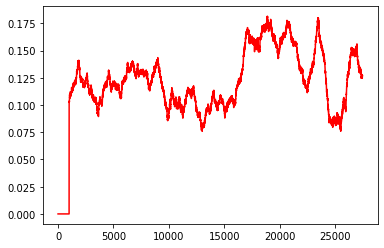

In [6]:
import matplotlib.pyplot as plt
rolling_1000 = df1.sentiment.rolling(window=1000).mean()
df1['rolling'] = rolling_1000.fillna(0)

plt.plot(df1['rolling'],'r-')
plt.show()


#df1.groupby('class').plot(kind='kde', ax=plt.gca())

In [8]:
#rolling_1000.fillna(0)

In [7]:
datelist = df1.date.unique()
#for datetime in datelist:
#    print(datetime, df[df.date == datetime]['corona'].mean())

df1.groupby('date').mean()

,sentiment,rolling
date,,
01/30/21,0.123775,0.119056
01/31/21,0.179346,0.139529
02/02/21,0.083985,0.138104
02/04/21,0.119480,0.113074
